# Solving PDE IVPs

In our last class we explored relaxation methods for solving PDE boundary value problems. Now it is time to turn our attention to **initial value problems (IVPs)**, and some classic 1D PDEs!

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## The diffusion equation 

The one-dimensional diffusion equation, or heat equation, is the following:

$$\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}$$

## Forward Time, Center Space (FTCS)

One of the simplest finite difference methods we can derive to solve the diffusion equation is called FTCS, or Forward Time, Center Space. This method is simply a combination of two methods we have explored earlier in this class: it combines the forward Euler method in time (hence, "forward time") with the central difference method in space (hence, "centered space"). We will represent our spatial discretization with $i$ and our time discretization with $n$. 

The FTCS representation of the diffusion equation thus becomes:

$$\frac{u_i^{n+1} - u_i^n}{\Delta t} = D\frac{u^n_{i+1} - 2u_i^n + u^n_{i-1}}{\Delta x^2}$$

Take a moment to convince yourself that this is a forward Euler approximation of the time derivative and a central-difference version of the second derivative on the right. 

&#128310; Rearrange this equation to solve for $u_i^{n+1}$, and explain in your own words what this represents. ✅

✍🏽
$$u_i^{n+1} = \Delta t D\frac{u^n_{i+1} - 2u_i^n + u^n_{i-1}}{\Delta x^2} + u_i^n$$

This represents the value of our function at the future timestep at the same center location that we started at. 

### Solving the diffusion equation

Solve the diffusion equation for initial conditions $u(t=0, x) = 5cos(\pi x)$ and boundary conditions $u(t, 0) = 2$ and $u(t, 1) = 5$, with the diffusion coefficient $D = 0.008$. These and other parameters are outlined in the comments below. 

&#128310; Before you write a single line of code, think about what the solution to this diffusion equation should look like after a long time. If it helps, visualize the problem as an unevenly heated rod (remember that this is also the 1D heat equation) with ends held at 2 and 5 degrees. Describe what you expect the solution to look like. ✅

✍🏽 At a very long time, we expect that the solution will be a linear line going from 2 to 5 with a slope of 1. That is for every timestep $n$, our function (or heat) grows by 1. We know this because we expect any differential points with a slope greater than 1 to equalize and hence the minimum slope across the entire line is 1. 

&#128309; Solve the problem following the comments below. ✅

In [3]:
# Initialize the number of timesteps to 5000 and the number of spatial grid points to 100
total_n, total_i = 5000, 100
# Initialize the spatial grid, which should go from 0 to 1
spatial_grid = np.linspace(0, 1, total_i)
# Define deltax and deltat, where the total x extent is 1 and the total time extent is 30
deltax, deltat = 1 / total_i, 30 / total_n
# Set the diffusion coefficient D to 0.008
D = 0.008
# Initialize the solution matrix u, which will be a 2D array with nt rows and nx columns
u = np.zeros((total_n, total_i))
# Let's set our initial conditions as u(t=0, x) = 5cos(pi*x) and our boundary conditions as u(t, 0) = 2 and u(t, 1) = 5
u[0, :] = 5*np.cos(np.pi*spatial_grid)
u[:, 0] = 2
u[:, -1] = 5

# Step through time and solve the diffusion equation using the FTCS method and array indexing!
for t in range(total_n-1): 
    u[t+1, 1:total_i-1] = deltat * D * (u[t, 2:total_i] -2*u[t, 1:total_i-1] + u[t, 0:total_i-2])/(deltax**2) + u[t,1:total_i-1]

&#128309; Plot your solution (u as a function of x) every 300 timesteps or so. Experiment with the plot until you are satisfied with it. ✅

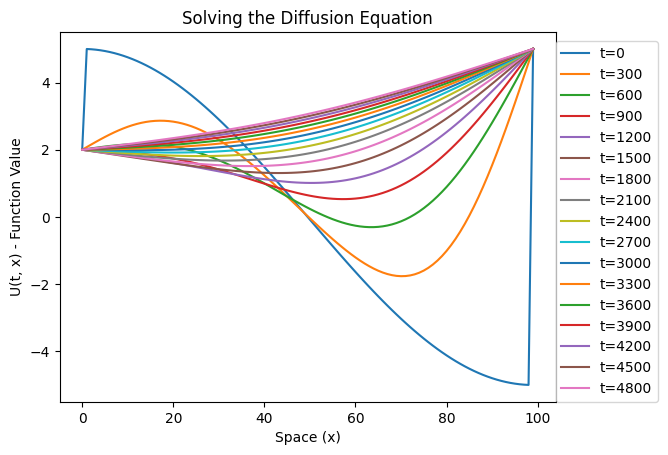

In [4]:
for time in np.arange(0, total_n, 300):
    plt.plot(u[time, :], label=("t=" + str(time)))

plt.xlabel("Space (x)")
plt.ylabel("U(t, x) - Function Value")
plt.title("Solving the Diffusion Equation")
plt.legend(loc=(1,0))
plt.show()

&#128310; Describe your plot. As time goes on, is the solution approaching what you visualized as the solution after long times? ✅

✍🏽 As time goes on, we approach a linear line that goes from 2 - 5, which is what we expected initially. This makes sense. We also recognize that intially at short times, we begin with a strongly varying solution that eventually begins to converge around t = 900. 

## Intro to Numerical Instability

Repeat the diffusion experiment above, but change the diffusion coefficient from 0.008 to 0.009. Keep everything else exactly the same, including the plotting. ✅

In [5]:
# Initialize the number of timesteps to 5000 and the number of spatial grid points to 100
total_n, total_i = 5000, 100
# Initialize the spatial grid, which should go from 0 to 1
spatial_grid = np.linspace(0, 1, total_i)
# Define deltax and deltat, where the total x extent is 1 and the total time extent is 30
deltax, deltat = 1 / total_i, 30 / total_n
# Set the diffusion coefficient D to 0.009
D = 0.009
# Initialize the solution matrix u, which will be a 2D array with nt rows and nx columns
u = np.zeros((total_n, total_i))
# Let's set our initial conditions as u(t=0, x) = 5cos(pi*x) and our boundary conditions as u(t, 0) = 2 and u(t, 1) = 5
u[0, :] = 5*np.cos(np.pi*spatial_grid)
u[:, 0] = 2
u[:, -1] = 5

# Step through time and solve the diffusion equation using the FTCS method and array indexing!
for t in range(total_n-1): 
    u[t+1, 1:total_i-1] = deltat * D * (u[t, 2:total_i] -2*u[t, 1:total_i-1] + u[t, 0:total_i-2])/(deltax**2) + u[t,1:total_i-1]

/var/folders/9r/sw7rn4810sjddctl8q8nlcy80000gn/T/ipykernel_66484/3765851827.py:18: RuntimeWarning: overflow encountered in add
  u[t+1, 1:total_i-1] = deltat * D * (u[t, 2:total_i] -2*u[t, 1:total_i-1] + u[t, 0:total_i-2])/(deltax**2) + u[t,1:total_i-1]
/var/folders/9r/sw7rn4810sjddctl8q8nlcy80000gn/T/ipykernel_66484/3765851827.py:18: RuntimeWarning: invalid value encountered in add
  u[t+1, 1:total_i-1] = deltat * D * (u[t, 2:total_i] -2*u[t, 1:total_i-1] + u[t, 0:total_i-2])/(deltax**2) + u[t,1:total_i-1]


&#128310; Eek! Describe in your own words what you observe. ✅

✍🏽 Now that we've replaced the diffusion coefficient, we recieved a overflow error, specifically an invalid value encountered in the add operation. This happens in the matrix operation step.

### von Neumann Stability Analysis

You should have just observed **numerical instability** of the FTCS method applied to the diffusion equation. A numerical scheme is called *stable* if numerical noise (from initial conditions,
round-off errors, etc.), does not grow. 

There are two distinct concepts we should add to our definition of stability: 

1. A numerical scheme is *consistent* if its discrete operators converge toward the continuous operators of the PDE as $\Delta x, \Delta t \rightarrow 0$. In other words, you recover the real PDE in the limit of vanishing trunctation error. 
2. A numerical scheme is *convergent* if its solution converges towards the real solution of the PDE in the limit $\Delta x, \Delta t \rightarrow 0$.

These concepts are related by Lax's equivalence theorem, which states that *for a consistent finite difference method, for a well-posed linear initial value problem, the method is convergent if and only if it is stable.* Since we ultimately care about convergence, this theorem lets us assess convergence by assessing consistency and stability. 

To understand and predict the numerical stability of different schemes, we use **von Neumann stability analysis**, which models the numerical noise as a Fourier series. When we are solving a linear PDE, the numerical noise, which is what is added to the actual solution, obeys the discretized PDE as well. Consider solutions of the form

$$u_i^n = \sum_k A_k^n e^{-ikx_i}$$

where $k$ is a real spatial wave number and $A_k$ is the **amplification factor** at a given wave number $k$. If you plug this Fourier series into our FTCS diffusion equation (and dust off some trig identities) you will find 

$$A_k = 1 - \frac{4 D \Delta t}{(\Delta x)^2} \sin^2(\frac{k \Delta x}{2})$$

Our equations are unstable if is $\left|A_k\right| \gt 1$ for any $k$. If we impose that $\left|A_k\right| \leq 1$, we derive the **stability criterion** for this problem

$$\frac{2 D \Delta t}{(\Delta x)^2} \leq 1$$

&#128309; Compute and nicely print the stability condition for the FTCS diffusion equation for the values used above. Try for both D = 0.009 and D = 0.008.  ✅

In [6]:
def stability_condition(D): 
    stability = ((2*D*deltat)/(deltax**2))
    return stability

print("Stability condition for 0.008: ", stability_condition(0.008))
print("Stability condition for 0.009: ", stability_condition(0.009))

Stability condition for 0.008:  0.96
Stability condition for 0.009:  1.0799999999999998


&#128310; Comment on the stability of the FTCS method applied to the diffusion equation.  ✅

✍🏽 Here we can see that for 0.009 we cross the threshold of being above 1 and hence we are instable. For the value D = 0.008, we are under the specified threshold and hence do meet the requirement of being stable. This validates that once we cross the threshold of 1 for our stability condition, this does determine whether or not our solution will converge like what we discovered earlier. 

Methods like this, that are stable under certain circumstances, are called *conditionally stable.* 

## The advection equation

It gets worse! If we instead consider the FTCS version of the advection equation,

$$\frac{\partial u}{\partial t} = -v \frac{\partial u}{\partial x}$$

we find

$$u_i^{n+1} = u_i^n - v\frac{\Delta t}{2 \Delta x} (u_{i+1}^n - u_{i-1}^n)$$

A von Neumann stability analysis will show that this is **unconditionally unstable**! Try it at home. In fact, the FTCS method is generally unstable for hyperbolic problems. Let's explore what to do about this -- but first, let's learn a new Python skill.

## List comprehensions

A Python **list comprehension** provides a powerful way to create a list by iterating over an iterable in one line. The list comprehension is written as brackets containing an expression and a `for` clause, sometimes followed by `if` clause(s) and/or additional `for` clauses. List comprehensions can be a great tool for writing cleaner, more readable code. 

The syntax for a simple list comprehension is as follows:
`newList = [ expression(element) for element in oldList if condition ]`

For example, let's say I want a list containing $x^2$ for the numbers 0-9, but only for odd values of $x$, I could write:

`squares = [x**2 for x in range(10) if x%2 == 1]`

`%` is the modulo operator in Python: `a % b` returns the remainder of $a/b$. Try it!

In [7]:
[x**2 for x in range(10) if x%2 == 1]

[1, 9, 25, 49, 81]

&#128309; Write a list comprehension that returns all numbers between 0 and 1000 that are divisible by 7. ✅

In [8]:
[x for x in range(1000) if x%7 == 0]

[0,
 7,
 14,
 21,
 28,
 35,
 42,
 49,
 56,
 63,
 70,
 77,
 84,
 91,
 98,
 105,
 112,
 119,
 126,
 133,
 140,
 147,
 154,
 161,
 168,
 175,
 182,
 189,
 196,
 203,
 210,
 217,
 224,
 231,
 238,
 245,
 252,
 259,
 266,
 273,
 280,
 287,
 294,
 301,
 308,
 315,
 322,
 329,
 336,
 343,
 350,
 357,
 364,
 371,
 378,
 385,
 392,
 399,
 406,
 413,
 420,
 427,
 434,
 441,
 448,
 455,
 462,
 469,
 476,
 483,
 490,
 497,
 504,
 511,
 518,
 525,
 532,
 539,
 546,
 553,
 560,
 567,
 574,
 581,
 588,
 595,
 602,
 609,
 616,
 623,
 630,
 637,
 644,
 651,
 658,
 665,
 672,
 679,
 686,
 693,
 700,
 707,
 714,
 721,
 728,
 735,
 742,
 749,
 756,
 763,
 770,
 777,
 784,
 791,
 798,
 805,
 812,
 819,
 826,
 833,
 840,
 847,
 854,
 861,
 868,
 875,
 882,
 889,
 896,
 903,
 910,
 917,
 924,
 931,
 938,
 945,
 952,
 959,
 966,
 973,
 980,
 987,
 994]

&#128309; Write a list of 10 or so words -- whatever the first 10 words that come to mind are. Write a list comprehension that returns the length of each of the words using `len(string)` to find the length of each. ✅ *Optional bonus hint*: if you want to get fancy, you can create your list of 10 words using a list comprehension and a string that represents a sentence by using `string.split()`. Try it!

In [9]:
words = ["physics", "tissues", "computer", "iphone", "chair", "allergies", "seven", "chinese", "timestep", "forward"]
[len(word) for word in words]

[7, 7, 8, 6, 5, 9, 5, 7, 8, 7]

## The advection problem with a square wave

Let's investigate the advection problem, starting with a classic test problem for numerical schemes. Consider a single squarewave pulse defined by the condition:

$$u(x) = \begin{cases}
    1, & \text{if } 0.4 \leq x \leq 0.6\\
    0, & \text{otherwise}\\
\end{cases}$$

&#128309; Why were we talking about list comprehensions? Because an elegant way to create our square wave initial condition is to write a function `squarewave` that evaluates the above conditional, and then assign it to our $x$ domain using a list comprehension (instead of a for loop). Do that below, using a 100-element grid for x that spans values 0 to 1. ✅ Convert your list into a numpy array. ✅ Plot your results and be sure they look as expected. ✅

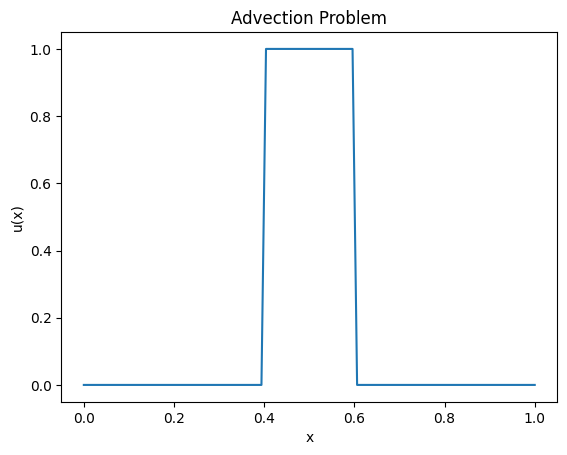

In [10]:
def squarewave(i):
    return 1 if (i >= 0.4 and i <= 0.6) else 0

x_vals = np.linspace(0, 1, 100)
u = [squarewave(i) for i in x_vals]

plt.plot(x_vals, u, label="Single Squarewave pulse")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Advection Problem")

plt.show()

I got to here on 5/9/2024. 

I worked with Ivan. 

I would score my participation a 7/10. 

Some of the challenges included my allergies and needing to remind myself about various syntax challenges throughout the day. I did a good job getting most of the code for the Numerical instability content and forcing myself to use array indexing as opposed to for loops from the beginning.

### The `np.roll` function

We're going to use periodic boundary conditions for this problem, meaning that stepping off of our x domain on one side means stepping *on* to our domain from the other side. A useful numpy function is `np.roll`. Check out <a target="_blank" rel="noopener noreferrer" href="https://numpy.org/doc/stable/reference/generated/numpy.roll.html">the documentation for `np.roll`</a>. 

&#128309; Roll your squarewave pulse by 20, by 40, by 60, etc., and plot the results on the same plot as the original. ✅

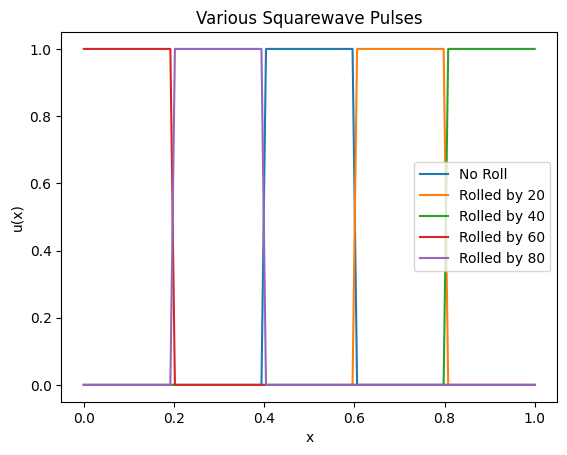

In [11]:
x_vals = np.linspace(0, 1, 100)
u = [squarewave(i) for i in x_vals]
plt.plot(x_vals, u, label=("No Roll"))

for roll in [20, 40, 60, 80]:
    u = [squarewave(i) for i in x_vals]
    plt.plot(x_vals, np.roll(u, roll), label=("Rolled by " + str(roll)))

plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Various Squarewave Pulses")

plt.legend()
plt.show()

&#128310; Explain on your results and explain how `np.roll` works in your own words. How would you roll your pulse ``backward`` instead of forward? ✅

✍🏽 As we study our results, the roll function has shifted our squarewave backwards and forwards by increments of 0.2. Based on this, we can assume that np.roll rotates the list, hence in practice allows us to move our squarewave by how much ever we would like to. If we needed to move the pulse backward, then we can use a negative roll number, hence rotating the list backwards. This provides a helpful way to visualize a moving wave without having to use complex wave equations and such. 

### Applying FTCS to the advection problem for our square wave

We are finally ready to apply FTCS advection to our square wave. 

&#128310; Before writing any code, describe what you expect to see if you advect your square wave and your method works perfectly (i.e. if your method is stable and consistent). ✅

✍🏽 If we advect our square wave and our method works, then we expect our system to tranform the periodic boundary condition to a square wave, and this would be by eventually converging on the square wave and becoming more and more rigid over time. We also predict that because this is the advection equation, we expect the wave to move to the right over time. 

To save you some scrolling, here is the FTCS version of the 1D advection equation again:

$$u_i^{n+1} = u_i^n - v\frac{\Delta t}{2 \Delta x} (u_{i+1}^n - u_{i-1}^n)$$

And we will use periodic boundary conditions. 

&#128309; Implement FTCS advection for your square wave following the comments below. ✅

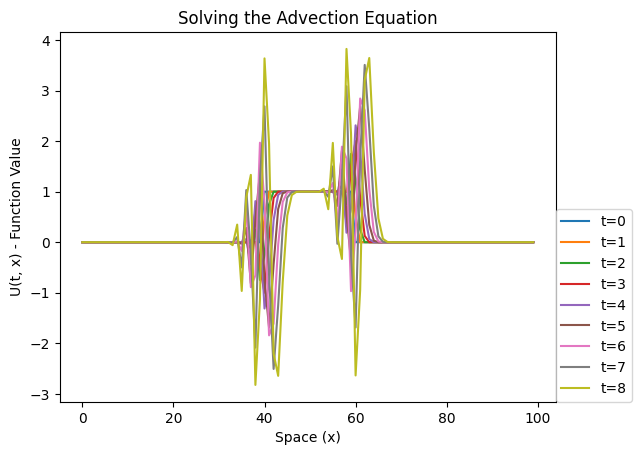

In [12]:
# Initialize the number of timesteps (nt) to 10 and the number of spatial grid points (nx) to 100
nt, nx = 10, 100
# Define deltax and deltat, where the total x extent is 1 and the total time extent is 0.1
deltax, deltat = 1 / nx, 0.1 / nt
# Define the constant v to be 1.0
v = 1
# Initialize the spatial grid, which should go from 0 to 1
spatial_grid = np.linspace(0, 1, nx)
# Initialize the solution matrix u, which will be a 2D array with nt rows and nx columns
u = np.zeros((nt, nx))
# Set the initial conditions of u using your squarewave function and a list comprehension
u[0, :] = [squarewave(grid_val) for grid_val in spatial_grid]
# Step through time and solve the advection equation using the FTCS method and np.roll! Plot your results for each timestep.
for t in range(nt-1): 
    u[t+1, 1:nx-1] = u[t,1:nx-1] - ((v * deltat)/(2 * deltax))*(np.roll(u[t, 1:nx-1], -1) - np.roll(u[t, 1:nx-1], 1))
    plt.plot(u[t, :], label=("t=" + str(t)))

plt.xlabel("Space (x)")
plt.ylabel("U(t, x) - Function Value")
plt.title("Solving the Advection Equation")
plt.legend(loc=(1,0))
plt.show()

&#128310; Describe and explain your results in your own words. ✅

✍🏽 We notice that at later time steps, the equation is correctly moving or translating to the right. However, we recognize that the solution appears to not be very exact, with recognizable sinusoidal behavior specifically at t=8. Hence our results are that we have a non convergent solution as time progresses, but it does translate.

<!-- As we predicted, we see that for later time increments like t=8, the square wave form is better represented with short spikes at either end. Alternatively, at short times like t=0 or t=3, the wave looks more sinusoidal. Therefore as time progresses, our wave begins to converge onto the squarewave we predicted.  -->

## The Lax Method

Let's make a slight tweak to the FTCS method: instead of using the $u_i^n$ term in the time derivative, let's use the average of the two adjacent points, i.e.:

$$u_i^n \rightarrow \frac{1}{2}\left(u_{i+1}^n + u_{i-1}^n\right)$$

If we make this replacement, the Lax method expression for the advection equation becomes

$$u_i^{n+1} = \frac{1}{2}\left(u_{i+1}^n + u_{i-1}^n\right) - v\frac{\Delta t}{2 \Delta x} (u_{i+1}^n - u_{i-1}^n)$$

&#128309; Implement Lax advection for your square wave. Use exactly the same constants and discretization as in the FTCS method version of the advection equation above, and plot your result. ✅

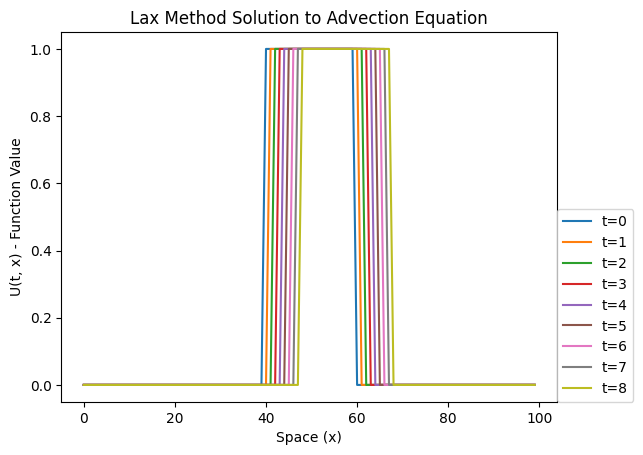

In [13]:
# Initialize the number of timesteps (nt) to 10 and the number of spatial grid points (nx) to 100
nt, nx = 10, 100
# Define deltax and deltat, where the total x extent is 1 and the total time extent is 0.1
deltax, deltat = 1 / nx, 0.1 / nt
# Define the constant v to be 1.0
v = 1
# Initialize the spatial grid, which should go from 0 to 1
spatial_grid = np.linspace(0, 1, nx)
# Initialize the solution matrix u, which will be a 2D array with nt rows and nx columns
u = np.zeros((nt, nx))
# Set the initial conditions of u using your squarewave function and a list comprehension
u[0, :] = [squarewave(grid_val) for grid_val in spatial_grid]
# Step through time and solve the advection equation using the FTCS method and np.roll! Plot your results for each timestep.
for t in range(nt-1): 
    u[t+1, 1:nx-1] = 0.5*(np.roll(u[t, 1:nx-1], 1) + np.roll(u[t, 1:nx-1], -1)) - ((v * deltat)/(2 * deltax))*(np.roll(u[t, 1:nx-1], -1) - np.roll(u[t, 1:nx-1], 1))
    plt.plot(u[t, :], label=("t=" + str(t)))

plt.xlabel("Space (x)")
plt.ylabel("U(t, x) - Function Value")
plt.title("Lax Method Solution to Advection Equation")
plt.legend(loc=(1,0))
plt.show()

&#128310; Explain your plot in your own words. Is this working better or worse than the FTCS method for the advection problem? How do you know? ✅

✍🏽 Compared to the FTCS method, this seems to be working better because the squarewaves that we've wanted to identify appear much clearer in this model. We know this is working better because we have more rigid edges and corners to our solution.  

&#128309; Use the Lax method code above, but run for 100 timesteps instead of 10 and plot.

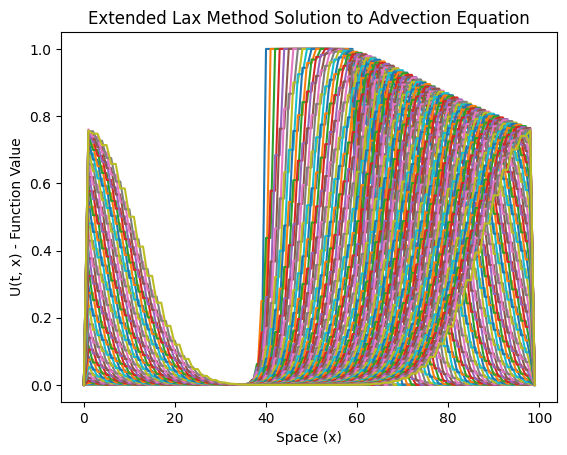

In [14]:
# Initialize the number of timesteps (nt) to 10 and the number of spatial grid points (nx) to 100
nt, nx = 100, 100
# Define deltax and deltat, where the total x extent is 1 and the total time extent is 0.1
deltax, deltat = 1 / nx, 0.1 / nt
# Define the constant v to be 1.0
v = 1
# Initialize the spatial grid, which should go from 0 to 1
spatial_grid = np.linspace(0, 1, nx)
# Initialize the solution matrix u, which will be a 2D array with nt rows and nx columns
u = np.zeros((nt, nx))
# Set the initial conditions of u using your squarewave function and a list comprehension
u[0, :] = [squarewave(grid_val) for grid_val in spatial_grid]
# Step through time and solve the advection equation using the FTCS method and np.roll! Plot your results for each timestep.
for t in range(nt-1): 
    u[t+1, 1:nx-1] = 0.5*(np.roll(u[t, 1:nx-1], 1) + np.roll(u[t, 1:nx-1], -1)) - ((v * deltat)/(2 * deltax))*(np.roll(u[t, 1:nx-1], -1) - np.roll(u[t, 1:nx-1], 1))
    plt.plot(u[t, :])

plt.xlabel("Space (x)")
plt.ylabel("U(t, x) - Function Value")
plt.title("Extended Lax Method Solution to Advection Equation")
plt.show()

&#128310; Describe what happens for the 100-timestep case. Experiment with other parameters in your code to understand their effects. ✅

✍🏽 In the 100 timestep case our solution collapses from the squarewave to an also periodic or gaussian condition. This might be because we have randomized error and hence over 100 timesteps these errors compound to become a roughly gaussian distribution. We do still see the correct advection behavior moving to the right however. As we change the other parameters like the constant V, we see that this dramatically increases the rolling factor.

What is going on? If we do the von Neumann stability analysis on the Lax implementation of the advection equation, you will find an amplification factor 

$$A_k = \cos (k \Delta x) - i \frac{v \Delta t}{\Delta x} \sin (k \Delta x)$$

And, imposing $\left|A\right|^2 \leq 1$, we find the stability criterion

$$\frac{v \Delta t}{\Delta x} \leq 1$$

This is the famous **Courant-Friedrichs-Lewy stability criterion**, also called the "CFL condition". Thus as long as your parameters satisfy this condition, the Lax implementation of the advection equation will be stable. But in your experiment above, you should have discovered that the *amplitude of your square wave decays* as time goes on. Why? Let's rewrite the Lax advection equation in just a slightly different form:

$$\frac{u_i^{n+1} - u_i^{n}}{\Delta t} = -v \left(\frac{u_{i+1}^n - u_{i-1}^n}{2\Delta x}\right) + \frac{1}{2}\left(\frac{u_{i + 1}^n - 2u_i^n + u_{i-1}^n}{\Delta t}\right)$$ 

Squint at this, and you'll realize that it's just the FTCS representation of the following equation:

$$\frac{\partial u}{\partial t} = -v \frac{\partial u}{\partial x} + \frac{(\Delta x)^2}{2\Delta t} \nabla^2 u$$

&#128310; Wait-- that's not just the advection equation any more! What type of term have we added? ✅

✍🏽 Now instead of a 1D advection equation, we have a PDE with a laplacian term. This laplacian term is of the current state $u$. The laplacian term might be useful for certain functions where calculating the second derivative is easy, but this is generally a challenging term to find. 

This scheme is said to have **numerical dissipation**. We have developed a scheme to solve the advection equation that is *conditionally stable* at the expense of adding this numerical dissipation. This is just a taste of the wide, awesome world of numerical techniques for solving PDE systems. A key takeaway: numerical stability depends on your solver and your problem, and *must* be understood!

# Acknowledgments

S.E. Clark, with thanks to Numerical Recipes (Press et al 2007).